<h1> Dstl Satellite Imagery Feature Detection </h1>

## 1. Business Problem

## 1.1 Description

Dstl's Satellite Imagery competition, which ran on Kaggle from December 2016 to March 2017, challenged Kagglers to identify and label significant features like waterways, buildings, and vehicles from multi-spectral overhead imagery. Automating feature labeling will not only help Dstl make smart decisions more quickly around the defense and security of the UK, but also bring innovation to computer vision methodologies applied to satellite imagery.

<p style='font-size:18px'><b> Problem Statemtent </b></p>

In this competition, Dstl provides you with 1km x 1km satellite images in both 3-band and 16-band formats. Your goal is to detect and classify the types of objects found in these regions.

3- and 16-bands images

There are two types of imagery spectral content provided in this competition. The 3-band images are the traditional RGB natural color images. The 16-band images contain spectral information by capturing wider wavelength channels. This multi-band imagery is taken from the multispectral (400 – 1040nm) and short-wave infrared (SWIR) (1195-2365nm) range.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/dstl-satellite-imagery-feature-detection/overview </p>

<h1> 2. Deep Learning problem </h1>
<h2> 2.1 Data 
<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/dstl-satellite-imagery-feature-detection/data
<br>All of the data is in 5 files: <br/>

1. __train_wkt.csv__ - the WKT format of all the training labels.
 - ImageId - ID of the image
 - ClassType - type of objects (1-10)
 - MultipolygonWKT - the labeled area, which is multipolygon geometry represented in WKT format.
 
 
2. __three_band.zip__ - the complete dataset of 3-band satellite images. The three bands are in the images with file name = {ImageId}.tif. MD5 = 7cf7bf17ba3fa3198a401ef67f4ef9b4


3. __sixteen_band.zip__ - the complete dataset of 16-band satellite images. The 16 bands are distributed in the images with file name = {ImageId}_{A/M/P}.tif. MD5 = e2949f19a0d1102827fce35117c5f08a


4. __grid_sizes.csv__ - the sizes of grids for all the images
   - ImageId - ID of the image
   - Xmax - maximum X coordinate for the image
   - Ymin - minimum Y coordinate for the image


5. __train_geojson.zip__ - the geojson format of all the training labels(essentially these are the same information as train_wkt.csv)  


> All imagery credit to: Satellite Imagery © DigitalGlobe, Inc.

Imagery details
- Sensor : WorldView 3
- Wavebands :
   - Panchromatic: 450-800 nm
   - 8 Multispectral: (red, red edge, coastal, blue, green, yellow, near-IR1 and near-IR2) 400 nm - 1040 nm
   - 8 SWIR: 1195 nm - 2365 nm
- Sensor Resolution (GSD) at Nadir :
    - Panchromatic: 0.31m 
    - Multispectral: 1.24 m
    - SWIR: Delivered at 7.5m
- Dynamic Range
    Panchromatic and multispectral : 11-bits per pixel
    SWIR : 14-bits per pixel



<h3>2.1.2 Object types</h3>

In a satellite image, you will find lots of different objects like roads, buildings, vehicles, farms, trees, water ways, etc. Dstl has labeled 10 different classes:

1. __Buildings__ - large building, residential, non-residential, fuel storage facility, fortified building
2. __Misc. Manmade structures__
3. __Road__
4. __Track__ - poor/dirt/cart track, footpath/trail
5. __Trees__ - woodland, hedgerows, groups of trees, standalone trees
6. __Crops__ - contour ploughing/cropland, grain (wheat) crops, row (potatoes, turnips) crops
7. __Waterway__ 
8. __Standing water__
9. __Vehicle Large__ - large vehicle (e.g. lorry, truck,bus), logistics vehicle
10. __Vehicle Small__ - small vehicle (car, van), motorbike

Every object class is described in the form of Polygons and MultiPolygons, which are simply a list of polygons. We provide two different formats for these shapes: __[GeoJson](https://geojson.org/)__ and __[WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)__. These are both open source formats for geo-spatial shapes. 

<h2>2.2 Mapping the real world problem to a Deep Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<pre>
Goal is to detect and classify the types of objects found in these regions.
Object detection problem like roads, building, vehicles, farms, trees, water way etc.
</pre>

<h3> 2.2.2 Performance Metric </h3>

__Average Jaccard Index__ between the predicted multipolygons and the actual multipolygons.
- The __[Jaccard Index](https://en.wikipedia.org/wiki/Jaccard_index)__ for two regions A and B, also known as the "intersection over union", is defined as:

$ Jaccard = {\frac{TP}{TP+FP+FN} }= {{|A \cap B|}\over{|A \cup B|}} = {{|A \cap B|}\over{|A| + |B| - |A \cap B|}} $

In [0]:
!mkdir .kaggle

In [0]:
with open(".kaggle/kaggle.json", 'w+') as f:
  f.write('{"username":"omarkimo","key":"9ba7f9345e3cd8b307568c8febe41bd2"}')

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dstl-satellite-imagery-feature-detection -p /content

 45% 5.00M/11.1M [00:00<00:00, 14.3MB/s]
100% 11.1M/11.1M [00:00<00:00, 28.1MB/s]
100% 12.9G/12.9G [05:15<00:00, 49.1MB/s]
100% 12.9G/12.9G [05:15<00:00, 43.8MB/s]
 35% 5.00M/14.2M [00:00<00:00, 11.2MB/s]
100% 14.2M/14.2M [00:00<00:00, 29.0MB/s]
100% 7.29G/7.30G [03:26<00:00, 30.7MB/s]
100% 7.30G/7.30G [03:26<00:00, 37.9MB/s]
  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 15.3MB/s]
  0% 0.00/2.17k [00:00<?, ?B/s]
100% 2.17k/2.17k [00:00<00:00, 2.25MB/s]


In [0]:
funzip('/content/grid_sizes.csv.zip')

In [0]:

with zipfile.ZipFile('/content/new/sixteen_band.zip') as z:
  for i in range(5):
    for j in range(5):
      s = "6010_" + str(i) + "_"+str(j)
      with open('/content/sixteen_band/'+ s + '_A.tif', 'wb+') as f:
        f.write(z.read('sixteen_band/'+ s + '_A.tif'))
      with open('/content/sixteen_band/'+ s + '_P.tif', 'wb+') as f:
        f.write(z.read('sixteen_band/'+ s + '_P.tif'))
      with open('/content/sixteen_band/'+ s + '_M.tif', 'wb+') as f:
        f.write(z.read('sixteen_band/'+ s + '_M.tif'))

In [0]:

with zipfile.ZipFile('/content/three_band.zip') as z:
  for i in range(5):
    for j in range(5):
      s = "6010_" + str(i) + "_"+str(j)
      with open('/content/three_band/'+ s + '.tif', 'wb+') as f:
        f.write(z.read('three_band/'+ s + '.tif'))

In [0]:
funzip('/content/three_band.zip')

In [0]:
!unzip /content/train_geojson_v3.zip

In [0]:
funzip('/content/train_wkt_v4.csv.zip')

In [0]:
funzip('/content/sample_submission.csv.zip')

In [0]:
!rm -r -d train_geojson_v3/6040_1_3
!rm -r -d train_geojson_v3/6040_2_2
!rm -r -d train_geojson_v3/6040_4_4
!rm -r -d train_geojson_v3/6060_2_3
!rm -r -d train_geojson_v3/6070_2_3
!rm -r -d train_geojson_v3/6090_2_0
!rm -r -d train_geojson_v3/6100_1_3
!rm -r -d train_geojson_v3/6100_2_3
!rm -r -d train_geojson_v3/6100_2_2
!rm -r -d train_geojson_v3/6110_1_2
!rm -r -d train_geojson_v3/6110_3_1
!rm -r -d train_geojson_v3/6110_4_0
!rm -r -d train_geojson_v3/6120_2_0
!rm -r -d train_geojson_v3/6120_2_2
!rm -r -d train_geojson_v3/6140_1_2
!rm -r -d train_geojson_v3/6140_3_1
!rm -r -d train_geojson_v3/6150_2_3
!rm -r -d train_geojson_v3/6160_2_1
!rm -r -d train_geojson_v3/6170_0_4
!rm -r -d train_geojson_v3/6170_2_4
!rm -r -d train_geojson_v3/6170_4_1


In [0]:
!rm -r -d sixteen_band

In [0]:
!mkdir data msk subm weights three_band sixteen_band

In [0]:
!mv /content/new/sixteen_band.zip /content/sixteen_band.zip

In [0]:
!cp /content/new/sixteen_band.zip "/content/drive/My Drive/"

In [0]:
!cp /content/three_band.zip "/content/drive/My Drive/"

In [0]:
!unzip /content/drive/My\ Drive/dstl/sixteen_band.zip

In [0]:
!unzip /content/drive/My\ Drive/dstl/three_band.zip -d /content/drive/My\ Drive/dstl/

In [0]:
!cp -r /content/data "/content/drive/My Drive/"

In [0]:
!cp -r /content/train_geojson_v3 "/content/drive/My Drive/"
!cp -r /content/train_wkt_v4.csv "/content/drive/My Drive/"
!cp -r /content/grid_sizes.csv "/content/drive/My Drive/"
!cp -r /content/sample_submission.csv "/content/drive/My Drive/"

In [0]:
!cp -r /content/train_geojson_v3.zip "/content/drive/My Drive/"

In [0]:
!mkdir data msk subm weights

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow
import pandas as pd
import numpy as np
from shapely.wkt import loads           # https://pypi.org/project/Shapely/
from matplotlib.patches import Polygon, Patch  # plot Polygon using Matplotlib:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Polygon.html
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_similarity_score
from collections import defaultdict
from shapely.geometry import MultiPolygon, Polygon
import shapely.wkt
import shapely.affinity
import os
import zipfile
!pip install tifffile
import tifffile as tiff
import cv2

In [0]:
tr_wkt = pd.read_csv('/content/drive/My Drive/dstl/train_wkt_v4.csv')  # Well-known text Multipolygon
grid_sizes = pd.read_csv('/content/drive/My Drive/dstl/grid_sizes.csv', names=['ImageId', 'Xmax', 'Ymin'], skiprows=1)

def convert_coordinates(coords, img_size, xy_coords):
    '''
    Convert all image coordinates given range
    '''
    # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
    Xmax, Ymin = xy_coords              # Xmax - maximum X coordinate for the image
                                        # Ymin - minimum Y coordinate for the image
    Height, Weight = img_size            # image sizes
    W = 1.0 * Weight * Weight / (Weight + 1)
    H = 1.0 * Height * Height / (Height + 1)
    xf = W / Xmax
    yf = H / Ymin
    coords[:, 1] *= yf
    coords[:, 0] *= xf
    coords_int = np.round(coords).astype(np.int32)
    return coords_int
def get_xmax_ymin(GS, imageId):
    '''
    Find maximum coordinates for x and minimun coordinates for y
    ''' 
    xmax, ymin = GS[GS.ImageId == imageId].iloc[0, 1:].astype(float)
    return (xmax, ymin)
def get_polygon_list(wkt_list, imageId, cType):
    '''
    Find polygon list for all images with there class label
    '''
    # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
    df_image = wkt_list[wkt_list.ImageId == imageId]
    multipoly_def = df_image[df_image.ClassType == cType].MultipolygonWKT
    polygonList = None
    if len(multipoly_def) > 0:
        assert len(multipoly_def) == 1
        polygonList = loads(multipoly_def.values[0])
    return polygonList
def get_and_convert_contours(polygonList, img_size, xy_coods):
    # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
    perim_list = []
    interior_list = []
    if polygonList is None:
        return None
    for k in range(len(polygonList)):
        poly = polygonList[k]
        perim = np.array(list(poly.exterior.coords))
        perim_c = convert_coordinates(perim, img_size, xy_coods)
        perim_list.append(perim_c)
        for pi in poly.interiors:
            interior = np.array(list(pi.coords))
            interior_c = convert_coordinates(interior, img_size, xy_coods)
            interior_list.append(interior_c)
    return perim_list, interior_list
def plot_mask_from_contours(img_size, contours):
    # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
    img_mask = np.zeros(img_size, np.uint8)
    if contours is None:
        return img_mask
    perim_list, interior_list = contours
    cv2.fillPoly(img_mask, perim_list,1)    
    cv2.fillPoly(img_mask, interior_list,0)
    return img_mask
def generate_mask_for_image_and_class(img_size, imageId, class_type, GS=grid_sizes, wkt_list=tr_wkt):
    '''
    Fill polygons exterior and interior points and return mask of images
    '''
    xy_coods = get_xmax_ymin(GS, imageId)
    polygon_list = get_polygon_list(wkt_list, imageId, class_type)
    contours = get_and_convert_contours(polygon_list, img_size, xy_coods)
    mask = plot_mask_from_contours(img_size, contours)
    return mask
def all_image(image_id, dims=20, size=800):
    if dims==3:
        filename = "three_band/{}.tif".format(image_id)
        img = tiff.imread(filename)
        img = np.rollaxis(img, 0, 3)
        img = cv2.resize(img, (size, size))
        
    elif dims==8:
        filename = "sixteen_band/{}_M.tif".format(image_id)
        img = tiff.imread(filename)
        img = np.rollaxis(img, 0, 3)
        img = cv2.resize(img, (size, size))
        
    elif dims==20:
        # zz3 = zipfile.ZipFile('/content/three_band.zip')
        # zz6 = zipfile.ZipFile('/content/sixteen_band.zip')
        # with open('/content/three_band/'+ str(image_id) + '.tif', 'wb+') as f:
        #     f.write(zz3.read('three_band/'+ str(image_id) + '.tif'))
        # with open('/content/sixteen_band/'+ str(image_id) + '_A.tif', 'wb+') as f:
        #     f.write(zz6.read('sixteen_band/'+ str(image_id) + '_A.tif'))
        # with open('/content/sixteen_band/'+ str(image_id) + '_P.tif', 'wb+') as f:
        #     f.write(zz6.read('sixteen_band/'+ str(image_id) + '_P.tif'))
        # with open('/content/sixteen_band/'+ str(image_id) + '_M.tif', 'wb+') as f:
        #     f.write(zz6.read('sixteen_band/'+ str(image_id) + '_M.tif'))
        # zz3.close()
        # zz6.close()
        # for type M 
        img_M = np.transpose(tiff.imread("/content/drive/My Drive/dstl/sixteen_band/{}_M.tif".format(image_id)), (1,2,0))
        img_M = cv2.resize(img_M, (size, size))
        # for type A
        img_A = np.transpose(tiff.imread("/content/drive/My Drive/dstl/sixteen_band/{}_A.tif".format(image_id)), (1,2,0))
        img_A = cv2.resize(img_A, (size, size))
        # for type P
        img_P = tiff.imread("/content/drive/My Drive/dstl/sixteen_band/{}_P.tif".format(image_id))
        img_P = cv2.resize(img_P, (size, size))

        filename = "/content/drive/My Drive/dstl/three_band/{}.tif".format(image_id)
        # for RGB 
        img_RGB = tiff.imread(filename)
        img_RGB = np.rollaxis(img_RGB, 0, 3)
        img_RGB = cv2.resize(img_RGB, (size, size))

        img = np.zeros((img_RGB.shape[0], img_RGB.shape[1], dims), "float32")
        img[..., 0:3] = img_RGB
        img[..., 3] = img_P
        img[..., 4:12] = img_M
        img[..., 12:21] = img_A
        
        # os.remove('three_band/'+ str(image_id) + '.tif')
        # os.remove('sixteen_band/'+ str(image_id) + '_A.tif')
        # os.remove('sixteen_band/'+ str(image_id) + '_P.tif')
        # os.remove('sixteen_band/'+ str(image_id) + '_M.tif')

    return img

In [0]:
def stretch_n(img, lower_percent=5, higher_percent=95):    # https://www.kaggle.com/aamaia/rgb-using-m-bands-example
    out = np.zeros_like(img, dtype=np.float32)
    n = img.shape[2]
    for i in range(n):
        a = 0       # np.min(img)
        b = 1       # np.max(img)
        c = np.percentile(img[:, :, i], lower_percent)
        d = np.percentile(img[:, :, i], higher_percent)
        t = a + (img[:, :, i] - c) * (b - a) / (d - c)
        t[t < a] = a
        t[t > b] = b
        out[:, :, i] = t
    return out.astype(np.float32)
smooth = 1e-12
def jaccard_coef(y_true, y_pred):
    # # __author__ = Vladimir Iglovikov
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return K.mean(jac)

def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return K.mean(jac)

In [0]:
N_Cls = 10 # total number of class
def stick_all_train():
    print("let's stick all imgs together")
    s = 800 # 800 is the size of the all images

    x = np.zeros((5 * s, 5 * s, 20))        # the array has the dimensions of 5 images wide and 5 images high. 20 Channels
    y = np.zeros((5 * s, 5 * s, N_Cls))

    ids = sorted(tr_wkt.ImageId.unique())
    print(len(ids))
    for i in range(5):
        for j in range(5):
            id = ids[5 * i + j]
            tmp = str(id).split('_')
            num = int(tmp[0])
            #if num >= 6100: break
            img = all_image(id)
            img = stretch_n(img)
            print(img.shape, id, np.amax(img), np.amin(img))
            x[s * i:s * i + s, s * j:s * j + s, :] = img[:s, :s, :]
            for z in range(N_Cls):
                y[s * i:s * i + s, s * j:s * j + s, z] = generate_mask_for_image_and_class((img.shape[0], img.shape[1]), id, z + 1)[:s, :s]

    print(np.amax(y), np.amin(y))

    np.save('data/x_trn_%d' % N_Cls, x)
    np.save('data/y_trn_%d' % N_Cls, y)

def get_patches(img, msk, amt=2500, aug=True):
    is2 = int(1.0 * ISZ)
    xm, ym = img.shape[0] - is2, img.shape[1] - is2

    x, y = [], []

    tr = [0.4, 0.1, 0.1, 0.15, 0.3, 0.95, 0.1, 0.05, 0.001, 0.005]      # threshold for all class which is the best for pixels
    for i in range(amt):
        xc = random.randint(0, xm)
        yc = random.randint(0, ym)

        im = img[xc:xc + is2, yc:yc + is2]        # generate random image
        ms = msk[xc:xc + is2, yc:yc + is2]        # generate random mask 

        for j in range(N_Cls):
            sm = np.sum(ms[:, :, j])
            if 1.0 * sm / is2 ** 2 > tr[j]:
                if aug:
                    if random.uniform(0, 1) > 0.5:
                        im = im[::-1]
                        ms = ms[::-1]
                    if random.uniform(0, 1) > 0.5:
                        im = im[:, ::-1]
                        ms = ms[:, ::-1]

                x.append(im)
                y.append(ms)

    x, y = 2 * np.transpose(x, (0, 3, 1, 2)) - 1, np.transpose(y, (0, 3, 1, 2))
    print(x.shape, y.shape, np.amax(x), np.amin(x), np.amax(y), np.amin(y))
    return x, y

## Split train and validation data

In [0]:
def make_val():
    print("let's pick some samples for validation")
    img = np.load('data/x_trn_%d.npy' % N_Cls)
    msk = np.load('data/y_trn_%d.npy' % N_Cls)
    x, y = get_patches(img, msk, amt=1500)  # ########################################changed 

    np.save('data/x_tmp_%d' % N_Cls, x)
    np.save('data/y_tmp_%d' % N_Cls, y)

In [7]:
import random
from keras.models import Model, load_model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
#K.set_image_dim_ordering('th')
K.set_image_data_format('channels_first')

Using TensorFlow backend.


In [0]:
ISZ = 160
def get_unet():
    inputs = Input((20, ISZ, ISZ))
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, 3, activation='relu', padding ='same')(pool4)
    conv5 = Conv2D(512, 3, activation='relu', padding ='same')(conv5)
    
    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=1)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(conv6)
    
    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=1)
    conv7 = Conv2D(128, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, 3, activation='relu', padding='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=1)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=1)
    conv9 = Conv2D(32, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(N_Cls, 1, activation='sigmoid')(conv9)

    model = Model(input=inputs, output=conv10)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[jaccard_coef, jaccard_coef_int, 'accuracy'])
    return model

In [0]:
model = get_unet()
#model.summary()

In [0]:
import keras
import pydot
from keras.utils import plot_model
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png');

In [0]:
def calc_jacc(model):
    img = np.load('data/x_tmp_%d.npy' % N_Cls)
    msk = np.load('data/y_tmp_%d.npy' % N_Cls)

    prd = model.predict(img, batch_size=4)
    print(prd.shape, msk.shape)
    avg, trs = [], []

    for i in range(N_Cls):
        t_msk = msk[:, i, :, :]
        t_prd = prd[:, i, :, :]
        t_msk = t_msk.reshape(msk.shape[0] * msk.shape[2], msk.shape[3])
        t_prd = t_prd.reshape(msk.shape[0] * msk.shape[2], msk.shape[3])

        m, b_tr = 0, 0
        for j in range(10):
            tr = j / 10.0
            pred_binary_mask = t_prd > tr

            jk = jaccard_similarity_score(t_msk, pred_binary_mask)      # calculate jaccard similarity for predict mask and actual mask
            if jk > m:
                m = jk
                b_tr = tr
        print(i, m, b_tr)
        avg.append(m)
        trs.append(b_tr)

    score = sum(avg) / 10.0
    return score, trs

In [0]:
def train_net():
    print("start train net")
    x_val, y_val = np.load('data/x_tmp_%d.npy' % N_Cls), np.load('data/y_tmp_%d.npy' % N_Cls)    # load validate data
    print('here1')
    img = np.load('data/x_trn_%d.npy' % N_Cls)
    print('here2')
    msk = np.load('data/y_trn_%d.npy' % N_Cls)
    print('here3')
    x_trn, y_trn = get_patches(img, msk)    # generate train data
    print('here4')
    #model = get_unet()      # call model
  
    model_checkpoint = ModelCheckpoint('weights/unet_tmp.hdf5', monitor='loss', save_best_only=True)   # moniter loss function
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs')          #tensorflow histogram for ploting
    arr = []
    for i in range(2):
        model.fit(x_trn, y_trn, batch_size=64, nb_epoch=5, verbose=1, shuffle=True,
                  callbacks=[model_checkpoint,tensorboard_callback], validation_data=(x_val, y_val))       # fit model
        del x_trn
        del y_trn
        x_trn, y_trn = get_patches(img, msk)
        score, trs = calc_jacc(model)
        print('val jk', score)
        arr.append(score)
        model.save_weights('weights/unet_10_jk%.4f' % score)       #save weights 
    os.rename('weights/unet_10_jk{}'.format(score[1]), 'weights/unet_10_jk_BestScore')

    return model

In [17]:
stick_all_train()

let's stick all imgs together
25
(800, 800, 20) 6010_1_2 1.0 0.0
(800, 800, 20) 6010_4_2 1.0 0.0
(800, 800, 20) 6010_4_4 1.0 0.0
(800, 800, 20) 6040_1_0 1.0 0.0
(800, 800, 20) 6040_1_3 1.0 0.0
(800, 800, 20) 6040_2_2 1.0 0.0
(800, 800, 20) 6040_4_4 1.0 0.0
(800, 800, 20) 6060_2_3 1.0 0.0
(800, 800, 20) 6070_2_3 1.0 0.0
(800, 800, 20) 6090_2_0 1.0 0.0
(800, 800, 20) 6100_1_3 1.0 0.0
(800, 800, 20) 6100_2_2 1.0 0.0
(800, 800, 20) 6100_2_3 1.0 0.0
(800, 800, 20) 6110_1_2 1.0 0.0
(800, 800, 20) 6110_3_1 1.0 0.0
(800, 800, 20) 6110_4_0 1.0 0.0
(800, 800, 20) 6120_2_0 1.0 0.0
(800, 800, 20) 6120_2_2 1.0 0.0
(800, 800, 20) 6140_1_2 1.0 0.0
(800, 800, 20) 6140_3_1 1.0 0.0
(800, 800, 20) 6150_2_3 1.0 0.0
(800, 800, 20) 6160_2_1 1.0 0.0
(800, 800, 20) 6170_0_4 1.0 0.0
(800, 800, 20) 6170_2_4 1.0 0.0
(800, 800, 20) 6170_4_1 1.0 0.0
1.0 0.0


In [20]:
make_val()

let's pick some samples for validation
(497, 20, 160, 160) (497, 10, 160, 160) 1.0 -1.0 1.0 0.0


In [0]:
import warnings
warnings.filterwarnings("default", category=DeprecationWarning)

In [22]:
model = train_net()

start train net
here1
here2
here3
(908, 20, 160, 160) (908, 10, 160, 160) 1.0 -1.0 1.0 0.0
here4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 908 samples, validate on 497 samples


Epoch 1/5
908/908 [==============================] - 45s 49ms/step - loss: 0.4403 - jaccard_coef: 0.0563 - jaccard_coef_int: 0.0379 - accuracy: 0.8492 - val_loss: 0.2136 - val_jaccard_coef: 0.0593 - val_jaccard_coef_int: 0.0539 - val_accuracy: 0.9412

Epoch 2/5
908/908 [==============================] - 24s 27ms/step - loss: 0.1933 - jaccard_coef: 0.0604 - jaccard_coef_int: 0.0411 - accuracy: 0.9375 - val_loss: 0.1757 - val_jaccard_coef: 0.0654 - val_jaccard_coef_int: 0.0561 - val_accuracy: 0.9448
Epoch 3/5
908/908 [==============================] - 25s 27ms/step - loss: 0.1680 - jaccard_coef: 0.0726 - jaccard_coef_int: 0.0622 - accuracy: 0.9443 - val_loss: 0.1547 - val_jaccard_coef: 0.0772 - val_jaccard_coef_int: 0.0569 - val_accuracy: 0.9452
Epoch 4/5
908/908 [==============================] - 24s 27ms/step - loss: 0.1507 - jaccard_coef: 0.0872 - jaccard_coef_int: 0.0644 - accuracy: 0.9467 - val_loss: 0.1424 - val_jaccard_coef: 0.0944 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0 0.6985789738430583 0.6
1 0.6317781690140845 0.7
2 0.83783953722334 0.5
3 0.39587525150905434 0.5
4 0.3797093628035005 0.3
5 0.705454171948847 0.6
6 0.9440392354124748 0.7
7 0.9670145875251509 0.5
8 0.9894114688128772 0.4
9 0.9478244466800805 0.4
val jk 0.7497525204772467
Train on 913 samples, validate on 497 samples
Epoch 1/5
913/913 [==============================] - 28s 31ms/step - loss: 0.1386 - jaccard_coef: 0.1048 - jaccard_coef_int: 0.1010 - accuracy: 0.9489 - val_loss: 0.1320 - val_jaccard_coef: 0.1020 - val_jaccard_coef_int: 0.1054 - val_accuracy: 0.9526
Epoch 2/5
913/913 [==============================] - 25s 27ms/step - loss: 0.1290 - jaccard_coef: 0.1148 - jaccard_coef_int: 0.1167 - accuracy: 0.9537 - val_loss: 0.1304 - val_jaccard_coef: 0.1144 - val_jaccard_coef_int: 0.1235 - val_accuracy: 0.9533
Epoch 3/5
913/913 [==============================] - 25s 27ms/step - loss: 0.1248 - jaccard_coef: 0.1228 - jaccard_coef_int: 0.1251 - accuracy: 0.9556 - val_loss: 0.1312 - val_ja

In [23]:
# call calc_jacc for calculate score
score, trs = calc_jacc(model)

(497, 10, 160, 160) (497, 10, 160, 160)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0 0.7119545482212725 0.4
1 0.6317781690140845 0.5
2 0.83783953722334 0.4
3 0.39587525150905434 0.4
4 0.41503253109388 0.4
5 0.8437582846697278 0.6
6 0.9596849605636677 0.7
7 0.9670145875251509 0.3
8 0.9894114688128772 0.3
9 0.9478244466800805 0.2


# Prediction for test data

## Create Mask for polygons

In [0]:
def mask_for_polygons(polygons, im_size):
    # __author__ = Konstantin Lopuhin
    # https://www.kaggle.com/lopuhin/dstl-satellite-imagery-feature-detection/full-pipeline-demo-poly-pixels-ml-poly
    img_mask = np.zeros(im_size, np.uint8)
    if not polygons:
        return img_mask
    int_coords = lambda x: np.array(x).round().astype(np.int32)
    exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
    interiors = [int_coords(pi.coords) for poly in polygons
                 for pi in poly.interiors]
    cv2.fillPoly(img_mask, exteriors, 1)
    cv2.fillPoly(img_mask, interiors, 0)
    return img_mask

## Mask to polygon for submation 

In [0]:
def mask_to_polygons(mask, epsilon=1, min_area=10):
    # https://www.kaggle.com/lopuhin/dstl-satellite-imagery-feature-detection/full-pipeline-demo-poly-pixels-ml-poly

    # first, find contours with cv2: it's much faster than shapely
    contours, hierarchy = cv2.findContours(((mask == 1) * 255).astype(np.uint8),cv2.RETR_CCOMP, cv2.CHAIN_APPROX_TC89_KCOS)
    # create approximate contours to have reasonable submission size
    approx_contours = [cv2.approxPolyDP(cnt, epsilon, True) for cnt in contours]
    if not contours:
        return MultiPolygon()
    # now messy stuff to associate parent and child contours
    cnt_children = defaultdict(list)
    child_contours = set()
    assert hierarchy.shape[0] == 1
    # http://docs.opencv.org/3.1.0/d9/d8b/tutorial_py_contours_hierarchy.html
    for idx, (_, _, _, parent_idx) in enumerate(hierarchy[0]):
        if parent_idx != -1:
            child_contours.add(idx)
            cnt_children[parent_idx].append(approx_contours[idx])
    # create actual polygons filtering by area (removes artifacts)
    all_polygons = []
    for idx, cnt in enumerate(approx_contours):
        if idx not in child_contours and cv2.contourArea(cnt) >= min_area:
            assert cnt.shape[1] == 1
            poly = Polygon(
                shell=cnt[:, 0, :],
                holes=[c[:, 0, :] for c in cnt_children.get(idx, [])
                       if cv2.contourArea(c) >= min_area])
            all_polygons.append(poly)
    # approximating polygons might have created invalid ones, fix them
    all_polygons = MultiPolygon(all_polygons)
    if not all_polygons.is_valid:
        all_polygons = all_polygons.buffer(0)
        # Sometimes buffer() converts a simple Multipolygon to just a Polygon,
        # need to keep it a Multi throughout
        if all_polygons.type == 'Polygon':
            all_polygons = MultiPolygon([all_polygons])
    return all_polygons

In [0]:
def predict_id(id, model, trs):
    img = all_image(id)
    x = stretch_n(img)

    cnv = np.zeros((960, 960, 20)).astype(np.float32)
    prd = np.zeros((N_Cls, 960, 960)).astype(np.float32)
    cnv[:img.shape[0], :img.shape[1], :] = x

    for i in range(0, 6):
        line = []
        for j in range(0, 6):
            line.append(cnv[i * ISZ:(i + 1) * ISZ, j * ISZ:(j + 1) * ISZ])

        x = 2 * np.transpose(line, (0, 3, 1, 2)) - 1
        tmp = model.predict(x, batch_size=4)
        for j in range(tmp.shape[0]):
            prd[:, i * ISZ:(i + 1) * ISZ, j * ISZ:(j + 1) * ISZ] = tmp[j]

    for i in range(N_Cls):
        prd[i] = prd[i] > trs[i]

    return prd[:, :img.shape[0], :img.shape[1]]

In [0]:
def predict_test(model, trs):
    print("predict test")
    for i, id in enumerate(sorted(set(submission['ImageId'].tolist()))):
        msk = predict_id(id, model, trs)
        np.save('msk/10_%s' % id, msk)
        if i % 100 == 0:
            print(i, id)

In [0]:
submission = pd.read_csv('/content/drive/My Drive/dstl/sample_submission.csv')
submission.head()

In [33]:
predict_test(model, trs)

predict test
0 6010_0_0
100 6050_1_0
200 6090_1_1
300 6130_2_4
400 6170_4_0


## Scale image for submission

In [0]:
def get_scalers(im_size, x_max, y_min):
    h, w = im_size  # they are flipped so that mask_for_polygons works correctly
    h, w = float(h), float(w)
    w_ = 1.0 * w * (w / (w + 1))
    h_ = 1.0 * h * (h / (h + 1))
    return w_ / x_max, h_ / y_min

## Make submassion on kaggle

In [0]:
def make_submit():
    """
    Creates the final submission by loading all raw predictions, creating 0-1 masks by thresholding them and
    creating Multipolygons from these masks.
    """
    print("make submission file")
    for idx, row in submission.iterrows():
        id = row[0]
        kls = row[1] - 1
        # Get the prediction from the respective class model and the best performing iteration of it
        msk = np.load('msk/10_%s.npy' % id)[kls]
        # msk = msk >= trs[kls]
        # Create correctly sizes polygons for the submission file
        pred_polygons = mask_to_polygons(msk)
        x_max = grid_sizes.loc[grid_sizes['ImageId'] == id, 'Xmax'].values[0]
        y_min = grid_sizes.loc[grid_sizes['ImageId'] == id, 'Ymin'].values[0]

        x_scaler, y_scaler = get_scalers(msk.shape, x_max, y_min)

        scaled_pred_polygons = shapely.affinity.scale(pred_polygons, xfact=1.0 / x_scaler, yfact=1.0 / y_scaler,
                                                      origin=(0, 0, 0))

        submission.iloc[idx, 2] = shapely.wkt.dumps(scaled_pred_polygons)
        if submission.iloc[idx, 2]=="GEOMETRYCOLLECTION EMPTY":
            submission.iloc[idx, 2] = "MULTIPOLYGON EMPTY"
        if idx % 100 == 0:
            print(idx)
    print(submission.head())
    submission.to_csv('subm/1.csv', index=False)

In [43]:
make_submit()

make submission file
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
    ImageId  ClassType                                    MultipolygonWKT
0  6120_2_4          1  MULTIPOLYGON (((0.0005399991562500 -0.00888158...
1  6120_2_4          2                                 MULTIPOLYGON EMPTY
2  6120_2_4          3                                 MULTIPOLYGON EMPTY
3  6120_2_4          4                                 MULTIPOLYGON EMPTY
4  6120_2_4          5  MULTIPOLYGON (((0.0091684963125000 -0.00195734...


In [44]:
submission.tail()

,ImageId,ClassType,MultipolygonWKT
4285,6130_1_0,6,MULTIPOLYGON (((0.0000000000000000 -0.00446907...
4286,6130_1_0,7,MULTIPOLYGON (((0.0066351285562500 -0.00739943...
4287,6130_1_0,8,MULTIPOLYGON EMPTY
4288,6130_1_0,9,MULTIPOLYGON EMPTY
4289,6130_1_0,10,MULTIPOLYGON EMPTY


## Check prediction

In [0]:
def check_predict(id='6120_2_2'):
    model = get_unet()
    model.load_weights('weights/unet_10_jk0.7700')

    msk = predict_id(id, model, trs)
    img = all_image(id)
    img = stretch_n(img)
    plt.figure()
    #ax1 = plt.subplot(131)
    plt.title('image ID:6120_2_3')
    plt.imshow(img[:, :, 5])
    plt.show()
    #ax2 = plt.subplot(132)
    plt.title('predict bldg pixels')
    plt.imshow(msk[0], cmap=plt.get_cmap('gray'))
    plt.show() 
    #ax3 = plt.subplot(133)
    plt.title('predict bldg polygones')
    plt.imshow(mask_for_polygons(mask_to_polygons(msk[0], epsilon=1), img.shape[:2]), cmap=plt.get_cmap('gray'))

    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


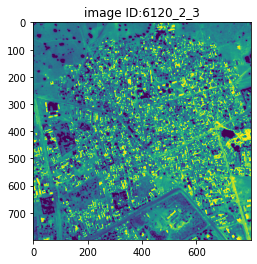

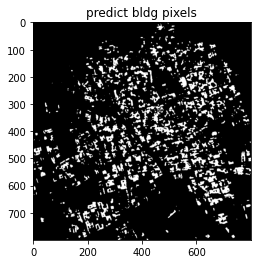

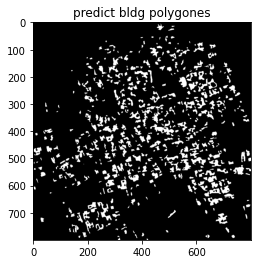

In [46]:
check_predict()

## Improvemnt

- Use large sizes of Image i.e.-1600
- Use hyperperameter tuning for U-Net.
- To improve, run the same U-Net model for several classes individually (change the output to only include one class). I used additional single models for buildings, structures, tracks and trees, the other predictions performed better from the 10 class model.

Thanks to visoft, n01z3, Sergey Mushinskiy, Konstantin Lopuhin for the great scripts and discussions.